In [1]:
pip install findspark pandas awswrangler numpy matplotlib seaborn pyspark


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import findspark
import pandas as pd
import awswrangler as wr
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as ticker
import boto3
import statistics

In [3]:
findspark.init()
df = pd.read_parquet('../../../generate data/datasets/general/')


In [4]:
df_models = df[df["partCodeId"].str.len() == 7]

df_models["formula_result"] = (df_models["dfQuantity"] - df_models["actualQuantity"]).abs() / df_models["actualQuantity"]
# Group by the correct columns
df_models_result = df_models.groupby([
    "partCodeId",
    "vehicleModelId",
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_models_result["final_result"].mean()
mode = df_models_result["final_result"].mode()[0]
median = df_models_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")


Average: 0.08378152765875432
Mode: 0.07857589851082805
Median: 0.08261847377218247


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/1843780195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_models["formula_result"] = (df_models["dfQuantity"] - df_models["actualQuantity"]).abs() / df_models["actualQuantity"]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/1843780195.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_models_result = df_models.groupby([


In [5]:
df_fullpc = df[df["partCodeId"].str.len() > 7]

df_fullpc["formula_result"] = (df_fullpc["dfQuantity"] - df_fullpc["actualQuantity"]).abs() / df_fullpc["actualQuantity"]
# Group by the correct columns
df_fullpc_result = df_fullpc.groupby([
    "partCodeId",
    "vehicleModelId"
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_fullpc_result["final_result"].mean()
mode = df_fullpc_result["final_result"].mode()[0]
median = df_fullpc_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/2638467781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fullpc["formula_result"] = (df_fullpc["dfQuantity"] - df_fullpc["actualQuantity"]).abs() / df_fullpc["actualQuantity"]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/2638467781.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fullpc_result = df_fullpc.groupby([


Average: 0.4033671931297834
Mode: 0.07897059463249119
Median: 0.569333377053768


In [6]:
df_nocolorpc = df[df["partCodeId"].str.len() > 7]
df_nocolorpc["partCodeId"] = df_nocolorpc["partCodeId"].str[:11]
df_nocolorpc["formula_result"] = (df_nocolorpc["dfQuantity"] - df_nocolorpc["actualQuantity"]).abs() / df_nocolorpc["actualQuantity"]
# Group by the correct columns
df_nocolorpc_result = df_nocolorpc.groupby([
    "partCodeId",
    "vehicleModelId"
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_nocolorpc_result["final_result"].mean()
mode = df_nocolorpc_result["final_result"].mode()[0]
median = df_nocolorpc_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")


/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/2592841570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocolorpc["partCodeId"] = df_nocolorpc["partCodeId"].str[:11]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/2592841570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocolorpc["formula_result"] = (df_nocolorpc["dfQuantity"] - df_nocolorpc["actualQuantity"]).abs() / df_nocolorpc["actualQuantity"]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykerne

Average: 0.3855834026847679
Mode: 0.07897059463249119
Median: 0.37704544869786555


In [7]:
df_nocolornoindexpc = df[df["partCodeId"].str.len() > 7]
df_nocolornoindexpc["partCodeId"] = df_nocolornoindexpc["partCodeId"].str[:10]
df_nocolornoindexpc["formula_result"] = (df_nocolornoindexpc["dfQuantity"] - df_nocolornoindexpc["actualQuantity"]).abs() / df_nocolornoindexpc["actualQuantity"]
# Group by the correct columns
df_nocolornoindexpc_result = df_nocolornoindexpc.groupby([
    "partCodeId",
    "vehicleModelId"
]).agg(
    final_result=("formula_result", "mean"),
).reset_index()

# Calculate statistics
average = df_nocolornoindexpc_result["final_result"].mean()
mode = df_nocolornoindexpc_result["final_result"].mode()[0]
median = df_nocolornoindexpc_result["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/2906707466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocolornoindexpc["partCodeId"] = df_nocolornoindexpc["partCodeId"].str[:10]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/2906707466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nocolornoindexpc["formula_result"] = (df_nocolornoindexpc["dfQuantity"] - df_nocolornoindexpc["actualQuantity"]).abs() / df_nocolornoindexpc["actualQuantity"]
/var/folders/x0

Average: 0.381306588234226
Mode: 0.0907100864649031
Median: 0.39143343645986006


In [ ]:
df_ics = df[df["partCodeId"].str.len() > 7]
df_ics["numberOfInstallationConditions"] = df_ics["numberOfInstallationConditions"].astype(int)
df_ics["formula_result"] = (df_ics["dfQuantity"] - df_ics["actualQuantity"]).abs() / df_ics["actualQuantity"]
# Group by the correct columns
df_ics_result = df_ics.groupby([
    "partCodeId",
    "vehicleModelId"
]).agg(
    maxNumberOfInstallationConditions=("numberOfInstallationConditions", "max"),
    final_result=("formula_result", "mean"),
).reset_index()

df_grouped_by_max_ics = df_ics_result.groupby("maxNumberOfInstallationConditions")["final_result"].median().reset_index()

#compare data with 0 ics and with ics 

# Calculate statistics
average = df_grouped_by_max_ics["final_result"].mean()
mode = df_grouped_by_max_ics["final_result"].mode()[0]
median = df_grouped_by_max_ics["final_result"].median()

print(f"Average: {average}")
print(f"Mode: {mode}")
print(f"Median: {median}")

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/1674370388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ics["numberOfInstallationConditions"] = df_ics["numberOfInstallationConditions"].astype(int)
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_40507/1674370388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ics["formula_result"] = (df_ics["dfQuantity"] - df_ics["actualQuantity"]).abs() / df_ics["actualQuantity"]
/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/i

Average: 0.5692972396826902
Mode: 0.5647197941036413
Median: 0.5696630688379334


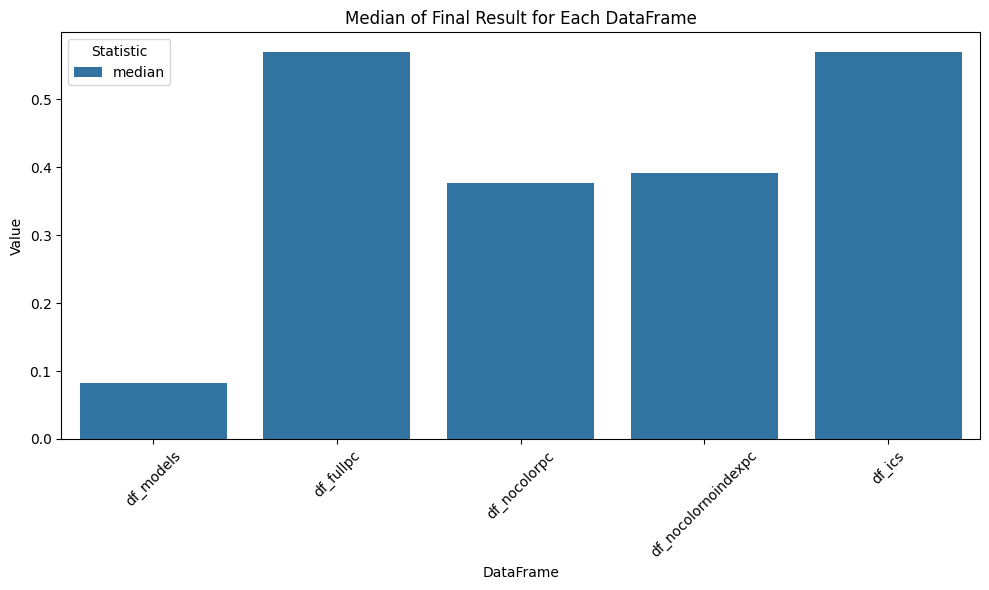

In [ ]:
#can I make a plot with all of the above dataframes? Plot the average, mode, and median for each of the dataframes

df_list = [df_models_result, df_fullpc_result, df_nocolorpc_result, df_nocolornoindexpc_result, df_grouped_by_max_ics]
df_names = ["df_models", "df_fullpc", "df_nocolorpc", "df_nocolornoindexpc", "df_ics"]
df_statistics = pd.DataFrame(columns=["df_name", "median"])
for i, df in enumerate(df_list):
    median = df["final_result"].median()
    df_statistics.loc[i] = [df_names[i], median]
df_statistics = df_statistics.set_index("df_name")
df_statistics = df_statistics.reset_index()
df_statistics = df_statistics.melt(id_vars=["df_name"], var_name="statistic", value_name="value")
plt.figure(figsize=(10, 6))
seaborn.barplot(x="df_name", y="value", hue="statistic", data=df_statistics)
plt.title("Median of Final Result for Each DataFrame")
plt.xlabel("DataFrame")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(title="Statistic")
plt.tight_layout()
plt.show()